In [17]:
import cv2
import matplotlib.pyplot as plt

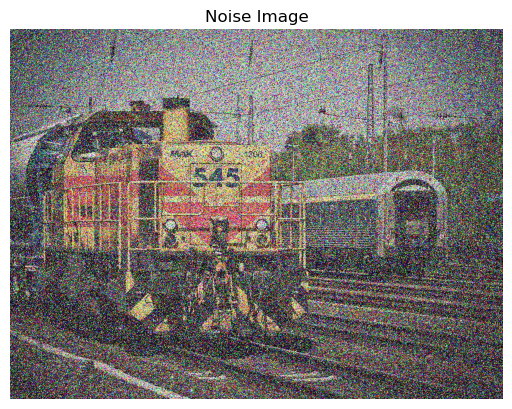

In [18]:
noise_img = cv2.imread('noise_image.jpg')

# Convert the image from BGR to RGB for correct color display
noise_img_rgb = cv2.cvtColor(noise_img, cv2.COLOR_BGR2RGB)

# Display the image using matplotlib
plt.imshow(noise_img_rgb)
plt.title('Noise Image')
plt.axis('off')  # Hide axes for better visualization
plt.show()

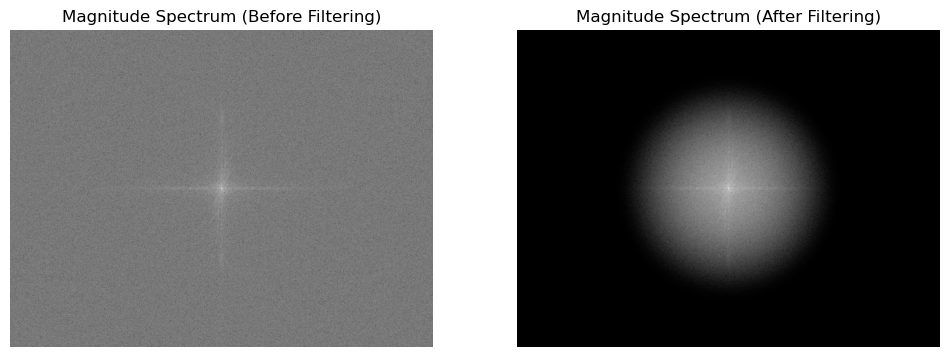

In [19]:
import numpy as np

gray_img = cv2.cvtColor(noise_img, cv2.COLOR_BGR2GRAY)

# Thực hiện FFT
f = np.fft.fft2(gray_img)
fshift = np.fft.fftshift(f)  # Dịch chuyển tần số thấp về trung tâm

# Tính phổ biên độ trước khi lọc
magnitude_spectrum_before = 20 * np.log(np.abs(fshift) + 1)

# Tạo bộ lọc Gaussian (lọc thông thấp)
rows, cols = gray_img.shape
crow, ccol = rows // 2 , cols // 2  # Tọa độ trung tâm
D = 50  # Bán kính lọc (có thể điều chỉnh)
x, y = np.meshgrid(np.linspace(-ccol, ccol, cols), np.linspace(-crow, crow, rows))
mask = np.exp(-(x**2 + y**2) / (2 * D**2))  # Bộ lọc Gaussian

# Áp dụng bộ lọc lên miền tần số
fshift_filtered = fshift * mask

# Tính phổ biên độ sau khi lọc
magnitude_spectrum_after = 20 * np.log(np.abs(fshift_filtered) + 1)

# Chuyển về miền thời gian bằng IFFT
f_ishift = np.fft.ifftshift(fshift_filtered)  # Dịch ngược về vị trí cũ
img_filtered = np.fft.ifft2(f_ishift)  # Biến đổi ngược IFFT
img_filtered = np.abs(img_filtered)  # Lấy giá trị thực

# Hiển thị kết quả
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(magnitude_spectrum_before, cmap='gray')
plt.title('Magnitude Spectrum (Before Filtering)')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(magnitude_spectrum_after, cmap='gray')
plt.title('Magnitude Spectrum (After Filtering)')
plt.axis('off')

plt.show()

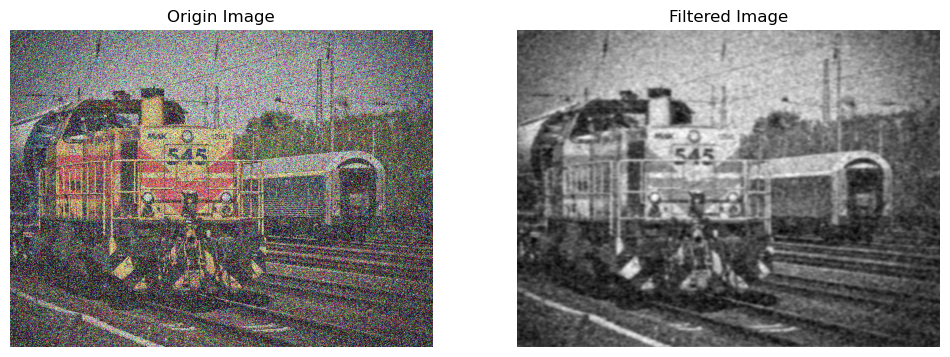

In [22]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(noise_img_rgb)
plt.title('Origin Image')
plt.axis('off') 

plt.subplot(1, 2, 2)
plt.imshow(img_filtered, cmap='gray')
plt.title('Filtered Image')
plt.axis('off')

plt.show()